# Custom Models and Training with TensorFlow

In [1]:
# FIXME: meke autocompletion working again
%config Completer.use_jedi = False

import os

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

## Tensors and Operations

### Tensors

In [2]:
# matrix
tf.constant([[1., 2., 3.], [4., 5., 6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
# scalar
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

### Indexing

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Operations

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### Using keras.backend

In [11]:
from tensorflow import keras

# Common alias for Keras backend
K = keras.backend

K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Tensors and NumPy
**Notice** that TF uses single precision by default while NumPy uses double precision.

In [12]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
# equivalent: `np.array(t)`
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Type Conversions
TF expects homogeneous data types which are checked and an exeption is raised when they do not match.

In [16]:
# These raise an `InvalidArgumentError`
# `tf.constant(2.) + tf.constant(40)`
# `tf.constant(2.) + tf.constant(40, dtype=tf.float64)

# These is ok
t2 = tf.constant(40, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Strings

In [17]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [18]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [19]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [20]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [21]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays

In [22]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [23]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

### Ragged tensors

In [24]:
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101], dtype=int32)>

In [25]:
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>

In [26]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [27]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
tf.concat([r, r3], axis=1)

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>

In [28]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [29]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse tensors

In [30]:
s = tf.SparseTensor(
    indices=[[0, 1], [1, 0], [2, 3]],
    values=[1., 2., 3.],
    dense_shape=[3, 4],
)
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [31]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [32]:
# This is ok
s2 = s * 2.0

# This is not ok
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [33]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])

tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [34]:
s5 = tf.SparseTensor(
    indices=[[0, 2], [0, 1]],
    values=[1., 2.],
    dense_shape=[3, 4],
)
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [35]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [36]:
s6 = tf.sparse.reorder(s5)

tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets

In [37]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])

tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [38]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [39]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

### Variables
All tensors shown above were immutable. To be able to mutate a tensor one can use a `Variable`.

In [40]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [41]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [42]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [43]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [44]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [45]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [46]:
sparse_delta = tf.IndexedSlices(
    values=[[1., 2., 3.], [4., 5., 6.]],
    indices=[1, 0],
)

v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Tensor Arrays

In [47]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [48]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [49]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean, variance

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>)

## Customizing Models and Algorithms

### Custom Loss Function

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and split the California Housing dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Scale the inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

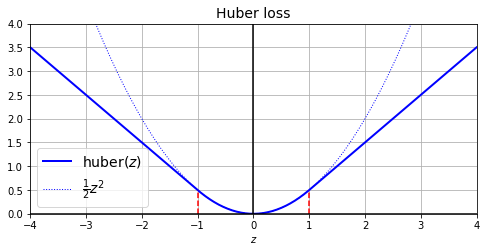

In [51]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

# Plot the Huber loss function
plt.figure(figsize=(8, 3.5))

z = np.linspace(-4, 4, 200)

plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")

plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)

plt.show()

In [52]:
input_shape = X_train.shape[1:]

# Build a model with custom Huber loss function
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

# Train the model for few epochs
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 1.0443 - mae: 1.4660 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2379 - mae: 0.5407 - val_loss: 0.2382 - val_mae: 0.5281


### Saving and loading models that contain custom components

In [53]:
model_path = os.path.join("data", "my_model_with_a_custom_loss.h5")

# Save the model - *name* of the custom function is saved with the model
model.save(model_path)

# To load the model one must bind names of custom components back to instances
model = keras.models.load_model(model_path, custom_objects={"huber_fn": huber_fn})

# Let's check that the restored model works
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2054 - mae: 0.4982 - val_loss: 0.2209 - val_mae: 0.5050
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1999 - mae: 0.4900 - val_loss: 0.2127 - val_mae: 0.4986


In [54]:
# Factory function for the Huber loss
def create_huber(threshold=1.0):
    
    # Parametrized Huber loss function
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    return huber_fn

# Build new model and train it a bit
model.compile(loss=create_huber(threshold=2.0), optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Save new model - only the loss function is saved, not the whole closure (i.e. not the parameter)
model_path = os.path.join("data", "my_model_with_a_custom_loss_2.h5")
model.save(model_path)

# To load this model we must rebuild the loss function instance
model = keras.models.load_model(model_path, custom_objects={"huber_fn": create_huber(2.0)})

# Finally, let's check that it worked
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2318 - val_loss: 0.2540
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2309 - val_loss: 0.2372
Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2147 - val_loss: 0.2133
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2119 - val_loss: 0.1992


In [55]:
# An alternative is to subclass the `Loss` class
#  - note that subclassing some components (like this one) has not yet been standardized
class HuberLoss(keras.losses.Loss):
    
    # Pass custom parameters as instance arguments
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    
    # Implementation of the loss function itself
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    # This method is called to restore custom parameters
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    
# Build new model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

# Train it for a bit
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Save new model - only the loss function is saved, not the whole closure (i.e. not the parameter)
model_path = os.path.join("data", "my_model_with_a_custom_loss_3.h5")
model.save(model_path)

# To load this model we must rebuild the loss function instance
model = keras.models.load_model(model_path, custom_objects={"HuberLoss": HuberLoss})

# Finally, let's check that it worked
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Check if custom parameter survived
model.loss.threshold

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.3123 - mae: 1.3345 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2659 - mae: 0.5270 - val_loss: 0.2660 - val_mae: 0.5089
Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2286 - mae: 0.4970 - val_loss: 0.2120 - val_mae: 0.4723
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2216 - mae: 0.4904 - val_loss: 0.2045 - val_mae: 0.4725


2.0

### Custom activation functions, initializers, regularizers and constraints

In [56]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def my_softplus(z):
    # equivalent to `tf.nn.softplus(z)`
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    # Equivalent to `tf.nn.relu(weights)`
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

# Build a model with these custom components
model = keras.models.Sequential([
    keras.layers.Dense(
        30,
        activation="selu",
        kernel_initializer="lecun_normal",
        input_shape=input_shape
    ),
    keras.layers.Dense(
        1,
        activation=my_softplus,
        kernel_regularizer=my_l1_regularizer,
        kernel_constraint=my_positive_weights,
        kernel_initializer=my_glorot_initializer),
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

# Train the model a bit
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Save the model
model_path = os.path.join("data", "my_model_with_many_custom_parts.h5")
model.save(model_path)

# Load the model just like we did it with custom loss function
model = keras.models.load_model(
    model_path,
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    },
)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.3829 - mae: 1.1635 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6299 - mae: 0.5410 - val_loss: 1.4399 - val_mae: 0.5137


In [57]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Subclassing these components works as well
class MyL1Regularizer(keras.regularizers.Regularizer):
    
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_config(self):
        # The Regularizer does not use any configs on its own so not need to call super
        return {"factor": self.factor}
    
# Build new model
model = keras.models.Sequential([
    keras.layers.Dense(
        30,
        activation="selu",
        kernel_initializer="lecun_normal",
        input_shape=input_shape,
    ),
    keras.layers.Dense(
        1,
        activation=my_softplus,
        kernel_regularizer=MyL1Regularizer(0.01),
        kernel_constraint=my_positive_weights,
        kernel_initializer=my_glorot_initializer),
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

# Train the model a bit
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Save the model
model_path = os.path.join("data", "my_model_with_many_custom_parts.h5")
model.save(model_path)

# Load the model just like we did it with custom loss function
model = keras.models.load_model(
    model_path,
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    },
)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.3829 - mae: 1.1635 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6299 - mae: 0.5410 - val_loss: 1.4399 - val_mae: 0.5137


### Custom metrics

In [58]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Build new model with Huber loss as a metric (as an artificial example)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

# Train the model a bit
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 3.5903 - huber_fn: 1.5558
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.8054 - huber_fn: 0.3095


**Warning**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:

* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the batch size (not the sum of weights, so the batch loss is not the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that `loss = metric * mean` of sample weights (plus some floating point precision error).

In [59]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1245 - huber_fn: 0.2515
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1216 - huber_fn: 0.2473


In [60]:
loss = history.history["loss"][0]
loss_from_metric = history.history["huber_fn"][0] * sample_weight.mean()

loss, loss_from_metric

(0.11749906837940216, 0.11906626312604573)

#### Streaming metrics
Also known as **Stateful metrics**. These metrics are gradually updated batch after batch - i.e. over the whole epoch, in contrast to normal metrics which are computed just over batches.

In [61]:
precision = keras.metrics.Precision()

# Updated once (batch 1)
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [62]:
# Updated twice (batch 2)
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [63]:
# Get the current state
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [64]:
# Access the variables that are being tracked in the state
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [65]:
# Manually reset the state
precision.reset_states()

precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [66]:
# Custom metric subclass for the Huber loss/metric
class HuberMetric(keras.metrics.Metric):
    
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        # Initialize the state
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    
    def huber_fn(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    # This method is responsible for the state update
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    
    def result(self):
        return self.total / self.count
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

# Try this custom metric
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [67]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [68]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [69]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [70]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Build a model with custom Huber metric
threshold = 2.0
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=create_huber(threshold), optimizer="nadam", metrics=[HuberMetric(threshold)])

# Train the model for few epochs
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 987us/step - loss: 1.5182 - huber_metric: 1.5182
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2909 - huber_metric: 0.2909


In [71]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Even simple implementation that takes advantage of the `Mean` class
class HuberMetric(keras.metrics.Mean):
    
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super().update_state(metric, sample_weight)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    

# Build a model with custom Huber metric
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=keras.losses.Huber(threshold), optimizer="nadam", metrics=[HuberMetric(threshold)])

# Train the model with some sample weights
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2, sample_weight=sample_weight)

# Compare the loss and metric
loss = history.history["loss"][0]
loss_from_metric = history.history["HuberMetric"][0] * sample_weight.mean()
loss, loss_from_metric

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.7800 - HuberMetric: 1.5417
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1462 - HuberMetric: 0.3000


(0.44554394483566284, 0.4432064726421927)

In [72]:
# Try saving and restoring the model
model_path = os.path.join("data", "my_model_with_a_custom_metric_v2.h5")
model.save(model_path)

model = keras.models.load_model(model_path, custom_objects={"HuberMetric": HuberMetric})

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

# -1 instead of 0 is because `tf.keras` adds an extra metric to the first position
model.metrics[-1].threshold

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2377 - HuberMetric: 0.2377
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2279 - HuberMetric: 0.2279


2.0

### Custom layers

In [73]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [74]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Try building, training and testing a model with custom exponential layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer,
])
model.compile(loss="mse", optimizer="nadam")

model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/5
162/162 [==============================] - 0s 734us/step - loss: nan


nan

In [75]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Custom Dense layer
class MyDense(keras.layers.Layer):
    
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        # Number of neurons in this layer
        self.units = units
        # Get the Keras function by the parameter
        self.activation = keras.activations.get(activation)

    # This method is called the first time Keras uses the model
    def build(self, batch_input_shape):
        # Register variables for the input weights
        self.kernel = self.add_weight(
            name="kernel",
            shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal",
        )
        # Regiter variables for the biases
        self.bias = self.add_weight(
            name="bias",
            shape=[self.units],
            initializer="zeros",
        )
        # This call must be at the end
        super().build(batch_input_shape)

    # Compute this layer's output
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    # Get the shape of layer's output
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    # Get bindings necessary to restore this layer
    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "units": self.units,
            "activation": keras.activations.serialize(self.activation),
        }

# Build, train and evaluate a model with custom dense layer
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])
model.compile(loss="mse", optimizer="nadam")

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 4.1268 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 904us/step - loss: 0.5474


0.5473727583885193

In [76]:
# Try saving and restoring this model
model_path = os.path.join("data", "my_model_with_a_custom_layer.h5")
model.save(model_path)

model = keras.models.load_model(model_path, custom_objects={"MyDense": MyDense})

In [77]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Example of a layer with two inputs and two outputs
class MyMultiLayer(keras.layers.Layer):
    # X is a tuple of two (or more) inputs
    def call(self, X):
        X1, X2 = X
        # Return a collection of outputs
        return X1 + X2, X1 * X2

    # Similarly here the argument and return value is a collection
    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

# Try this multi-layer out
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [78]:
# This example is actually an existing layer called `GaussianNoise`
class AddGaussianNoise(keras.layers.Layer):
    
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    # Call can additionally receive a `training` flag
    def call(self, X, training=None):
        if training:
            # Add some Gaussian noise
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        return X

    # This is probably not necessary, Keras/TF can infer it
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

# Try this layer out
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.5496 - val_loss: 0.5329
Epoch 2/2
162/162 [==============================] - 0s 748us/step - loss: 0.3990


0.39900389313697815

### Custom Models

In [79]:
X_new_scaled = X_test_scaled

In [80]:
from operator import add

# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


# Residual block composed of:
#  - n dense layers in sequence
#  - input connected and added to the final output
class ResidualBlock(keras.layers.Layer):
    
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        # Keras can automatically detect that `hidden` contains trackable objects and 
        # add their weights to between layer's variables
        self.hidden = [
            keras.layers.Dense(n_neurons, activation="elu", kernel_initializer="he_normal")
            for _ in range(n_layers)
        ]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

# Model composed of a sequence:
#  - single dense layer
#  - a residual block with 3 repeats
#  - followed by single residual block
#  - and finally a dense layer
class ResidualRegressor(keras.models.Model):
    
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(
            30,
            activation="elu",
            kernel_initializer="he_normal",
        )
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)


# Try this model out
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)  # test set predictions

Epoch 1/5
363/363 [==============================] - 3s 2ms/step - loss: 22.7478
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.2735
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9792
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5908
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.6498


### Losses and Metrics Based on Model Internals

In [81]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

class ReconstructingRegressor(keras.models.Model):
    
    def __init__(self, input_dim, output_dim, hidden_dim=30, n_hidden=5, recon_weight=0.05, **kwargs):
        super().__init__(**kwargs)
        # Weight of the recostruction loss
        #  - we don't want it to overweight the main objective
        self.recon_weight = recon_weight
        
        # Sequence of dense hidden layers
        self.hidden = [
            keras.layers.Dense(hidden_dim, activation="selu", kernel_initializer="lecun_normal")
            for _ in range(n_hidden)
        ]
        
        # Actual output layer
        self.out = keras.layers.Dense(output_dim)
        
        # Auxiliary layer the output of which serves to compute the reconstruction loss
        #  - it must be created here because it is potentially the first time we know the shape of inputs
        self.reconstruct = keras.layers.Dense(input_dim)
        
        # Metric that tracks the mean reconstruction error
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def call(self, inputs, training=None):
        # Compute the outputs before the final layer
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        
        reconstruction = self.reconstruct(Z)
        
        # Reconstuction loss is a mean squared difference between the output of the aux layer and inputs
        #  - the idea is to preserve as much information as possible which serves as regularization
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        
        # Register the reconstruction loss
        self.add_loss(self.recon_weight * recon_loss)
        
        if training:
            # Compute and register the mean of reconstruction loss as a metric
            recon_mean = self.reconstruction_mean(recon_loss)
            self.add_metric(recon_mean)
        
        return self.out(Z)
    
# Test the model
model = ReconstructingRegressor(input_dim=X_train_scaled.shape[1], output_dim=1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 1.6313 - reconstruction_error: 1.0474
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.4536 - reconstruction_error: 0.4022


### Computing Gradients with Autodiff

In [82]:
# Example function
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2


# Computing an approximate derivative at a point
def approx_df(f, w1, w2, eps=1e-6):
    fval = f(w1, w2)
    dw1 = (f(w1 + eps, w2) - fval) / eps
    dw2 = (f(w1, w2 + eps) - fval) / eps
    return dw1, dw2

# Compute derivatives of f at point (5, 3)
approx_df(f, w1=5, w2=3)

(36.000003007075065, 10.000000003174137)

In [83]:
# Compute the same gradients with TensorFlow's autodiff
w1, w2 = tf.Variable(5.), tf.Variable(3.)

with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [84]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)

# The `gradient` method can be called just once
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)
    
# To be able to call it multiple times, the tape must be made persistent
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

# This call releases all resources held by the tape
#  - typically this is left to the GC when the tape goes out of scope
del tape

A non-persistent GradientTape can only be used tocompute one set of gradients (or jacobians)


In [85]:
# Tape tracks only variables
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

# So this example returns `None`
gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [86]:
# Auxiliary tensors can be tracked by calling `watch`
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

# Due to watching c1 and c2 this call returns a value
gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [87]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [88]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [89]:
with tf.GradientTape(persistent=True) as hessian_tape:
    
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    
    jacobians = jacobian_tape.gradient(z, [w1, w2])

    
hessians = [
    hessian_tape.gradient(jacobian, [w1, w2])
    for jacobian in jacobians
]

del hessian_tape

In [90]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [91]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [92]:
# `stop_gradient` can be used to stop gradient propagation
#  - it will act just like `identity`
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [93]:
# Some computations might be numerically unstable
#  - for instance a Softmax activation for large inputs
x = tf.Variable(100.)

with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [94]:
# Fortunately for many activations we know the analytical solution (derivative)
#  - We can register custom activation that additionally returns a function evaluating the gradient
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    
    # The gradient function is evaluated as part of the chain rule (in autodiff)
    #  - so it receives gradients and it should multiply its output by them
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    
    return tf.math.log(exp + 1), my_softplus_gradients

# Actually in this case this re-implementation would be stable
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

# Let's test our custom implementation on very large input
x = tf.Variable([1000.])

with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

### Custom Training Loops

In [95]:
import time

# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def random_batch(X, y, batch_size=32):
    """Sample a batch from given dataset with corresponding labels"""
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)
    

def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join("{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or []))
    progress = progress_bar(iteration, total, size)
    print(f"\r{progress} - {metrics}", end="" if iteration < total else "\n")


# Build simple sequential model
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

# Define hyperparameters
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]


# Test out custom training loop with progress tracking
#  - we omit the fact that some examples may not ever be sampled
#  - related issue is that the batch size is not a multiple of the training set size
#  - gradient clipping hyperparameters are also omitted

# Repeat the training for `n_epochs`
for epoch in range(1, n_epochs + 1):
    
    print(f"Epoch {epoch}/{n_epochs}")
    
    # Run each training epoch for `n_steps`
    for step in range(1, n_steps + 1):
        
        # Sample a random batch of training examples
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        
        with tf.GradientTape() as tape:
            # Feed the training batch forward through the model
            #  - here we omit `training` flag to handle special layers
            y_pred = model(X_batch)
            # Add the mean main loss (MSE in this example) and additional model losses
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        
        # Evaluate gradients based on recorded forward pass and make an optimization step (Nadam)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        # Apply parameter transformations if such are defined in the model
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        
        # Account the loss from current step to the mean total loss
        mean_loss(loss)
        
        # Update metrics
        for metric in metrics:
            metric(y_batch, y_pred)
        
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    
    # Reset metrics at the end of each epoch
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 [==============================] - mean: 1.3955 - mean_absolute_error: 0.5722
Epoch 2/5
11610/11610 [==============================] - mean: 0.6774 - mean_absolute_error: 0.5280
Epoch 3/5
11610/11610 [==============================] - mean: 0.6351 - mean_absolute_error: 0.5177
Epoch 4/5
11610/11610 [==============================] - mean: 0.6384 - mean_absolute_error: 0.5181
Epoch 5/5
11610/11610 [==============================] - mean: 0.6440 - mean_absolute_error: 0.5222


## TensorFlow Functions

In [96]:
def cube(x):
    return x ** 3

cube(2)

8

In [97]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [98]:
tf_cube = tf.function(cube)
tf_cube

In [99]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [100]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

### TF Functions and Concrete Functions

In [101]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [102]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [103]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### Exploring Function Definitions and Graphs

In [104]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [105]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [106]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [107]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [108]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [109]:
concrete_function.function_def.signature

name: "__inference_cube_594558"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [110]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [111]:
# TF AutoGraph processes each function just once per input type and then caches it
#  - so the side-effect in `tf_cube` is not executed for the second time
#  - note: python literals are considered new and trigger execution graph generation
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [112]:
result = tf_cube(2)
result = tf_cube(3)

# New shape: trace!
result = tf_cube(tf.constant([[1., 2.]]))

# New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))

# New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]]))

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


In [113]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    # Drop half the rows and columns
    return images[:, ::2, ::2]

img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])

# Traces the function.
preprocessed_images = shrink(img_batch_1)

# Reuses the same concrete function.
preprocessed_images = shrink(img_batch_2)

# Rejects unexpected types or shapes
try:
    preprocessed_images = shrink(img_batch_3)
except ValueError as ex:
    print(ex)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)
Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


### Using Autograph To Capture Control Flow

In [114]:
# A static for loop using `range`
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [115]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [116]:
# A dynamic loop using `tf.while_loop`
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    _, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [117]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [118]:
# A dynamic for loop using `tf.range` (captured by autograph)
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### Handling Variables and Other Resources in TF Functions

In [119]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [120]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [121]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [122]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [123]:
class Counter:
    
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [124]:
def display_tf_code(func):
    from IPython.display import display, Markdown

    if hasattr(func, "python_function"):
        func = func.python_function
    
    code = tf.autograph.to_code(func)
    display(Markdown(f"```python\n{code}\n```"))

# Display the code of the example function generated by autograph
display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = (ag__.ld(x) + 1)
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### Using TF Functions with tf.keras (or Not)

By default, `tf.keras` will automatically convert your custom code into TF Functions, no need to use `tf.function()`:

In [125]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))


# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))


# Custom layer
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name='kernel', 
            shape=(input_shape[1], self.units),
            initializer='uniform',
            trainable=True,
        )
        self.biases = self.add_weight(
            name='bias', 
            shape=(self.units,),
            initializer='zeros',
            trainable=True,
        )
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

# Custom model
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

# Build custom model
model = MyModel()
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

# Train and evaluate the model
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
346/363 [===========================>..] - ETA: 0s - loss: 2.8501 - my_mae: 1.2689Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 [==============================] - 2s 2ms/step - loss: 2.7755 - my_mae: 1.2455 - val_loss: 0.5569 - val_my_mae: 0.4819
Epoch 2/2
162/162 [==============================] - 0s 675us/step - loss: 0.4164 - my_mae: 0.4639


[0.41635245084762573, 0.4639027416706085]

One can turn this off by creating the model with `dynamic=True`. Alternatively, one can `compile` a model with `run_eagerly=True` to achieve the same effect.

In [126]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Build the same model but prevent TF from automatically building and optimizing function graphs
model = MyModel(dynamic=True)
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

# Train and evaluate the model
model.fit(X_train_scaled[:64], y_train[:64], epochs=1, validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.507260322570801, 2.0566811561584473]

Alternatively, one can compile a model with `run_eagerly=True` to achieve the same effect.

## Exercises

### Implement a custom layer that performs *Layer Normalization*

In [131]:
class LayerNormalization(keras.layers.Layer):
    
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps

    def build(self, batch_input_shape):
        input_shape = batch_input_shape[-1:]
        self.alpha = self.add_weight("alpha", shape=input_shape, initializer="ones")
        self.beta = self.add_weight("beta", shape=input_shape, initializer="zeros")
        super().build(batch_input_shape)
    
    def call(self, X):
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        # Note: Adding epsilon to variance is preferable to adding is to std
        #  - training would bomb because the defivative of `sqrt(z)` is undefined for `z=0`
        std = tf.sqrt(variance + self.eps)
        return self.alpha * (X - mean) / std + self.beta
    
    def get_config(self):
        return {**super().get_config(), "eps": self.eps}

# Let's check that the custom layer produces similar output to the Keras layer

X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

def mean_impl_error(X, keras_layer, custom_layer):
    impl_error = keras.losses.mean_absolute_error(keras_layer(X), custom_layer(X))
    return tf.reduce_mean(impl_error)

mean_impl_error(X, custom_layer_norm, keras_layer_norm)

<tf.Tensor: shape=(), dtype=float32, numpy=5.496049e-08>

In [133]:
# To be sure, let's test it again with alpha and beta completely random
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

mean_impl_error(X, custom_layer_norm, keras_layer_norm)

<tf.Tensor: shape=(), dtype=float32, numpy=2.666699e-08>

### Train a model using a custom training loop to tackle the Fashion MNIST dataset
1. Display the epoch, iteration, mean training loss, and mean accuracy over each epoch (updated at each iteration), as well as the validation loss and accuracy at the end of each epoch.
1. Try using a different optimizer with a different learning rate for the upper layers and the lower layers.

In [139]:
from collections import OrderedDict

from tqdm.notebook import trange

# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Load, split and scale the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

max_value = 255.
val_split = 5000
input_shape = X_train[0].shape
output_dim = len(np.unique(y_test))  # no. classes

X_train_full = X_train_full.astype(np.float32) / max_value
X_valid, X_train = X_train_full[:val_split], X_train_full[val_split:]
y_valid, y_train = y_train_full[:val_split], y_train_full[val_split:]
X_test = X_test.astype(np.float32) / max_value

# Define hypeparameters
hidden_dim = 100
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]


# Build a simple sequential model with single ReLU hidden layer and Softmax output
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(hidden_dim, activation="relu"),
    keras.layers.Dense(output_dim, activation="softmax"),
])

# Custom training loop
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        
        with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
            for step in steps:
                
                # Sample a batch
                X_batch, y_batch = random_batch(X_train, y_train)
                
                # Feed the batch forward through the model and compute the batch losses
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                    
                # Evaluate gradients and make an optimization step
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                
                # Apply parameter trainsformations if these are defined
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))
                        
                status = OrderedDict()
                
                # Evaluate and record the total mean loss
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                
                # Update metrics
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                    
                steps.set_postfix(status)
                
            # Compute validation prediction and validation accuracy
            y_pred = model(X_valid)
            acc = keras.metrics.sparse_categorical_accuracy(tf.constant(y_valid, dtype=np.float32), y_pred)
            
            # Record the mean validation loss and accuracy
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(acc)
            
            steps.set_postfix(status)
        
        # Reset metrics at the end of each epoch
        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/1718 [00:00<?, ?it/s]

In [142]:
# Reset TF session and RNG state
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Build a new model with the same structure but split into lower and upper layers
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
])

upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation="softmax"),
])
both_layers = [lower_layers, upper_layers]

model = keras.models.Sequential(both_layers)

# Define hyperparameters
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

# Define separate optimizers for the lower and upper layer
lower_optimizer = keras.optimizers.SGD(lr=1e-4)
upper_optimizer = keras.optimizers.Nadam(lr=1e-3)
optimizers = [lower_optimizer, upper_optimizer]

# Custom training loop using two optimizers for lower and upper layers
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        
        with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
            for step in steps:
                
                # Sample a batch
                X_batch, y_batch = random_batch(X_train, y_train)
                
                # Feed the batch forward through the model and compute the batch losses
                with tf.GradientTape(persistent=True) as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                
                # Evaluate gradients and make an optimization step in both optimizers
                for layers, optimizer in zip(both_layers, optimizers):
                    gradients = tape.gradient(loss, layers.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
                
                # Manually release resources held by the autodiff
                del tape
                
                # Apply parameter trainsformations if these are defined
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                
                status = OrderedDict()
                
                # Evaluate and record the total mean loss
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                
                steps.set_postfix(status)
            
            # Compute validation prediction and validation accuracy
            y_pred = model(X_valid)
            acc = keras.metrics.sparse_categorical_accuracy(tf.constant(y_valid, dtype=np.float32), y_pred)
            
            # Record the mean validation loss and accuracy
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(acc)
            
            steps.set_postfix(status)
        
        # Reset metrics at the end of each epoch
        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/1718 [00:00<?, ?it/s]